In [11]:
#converting a jupyter notebook file to python script (module)
# !jupyter nbconvert --to script projective_geo.ipynb

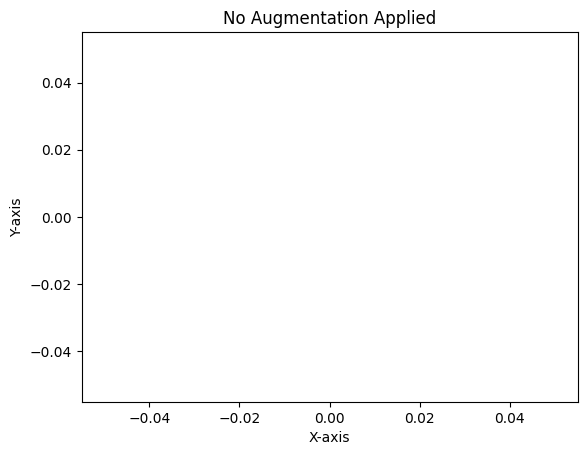

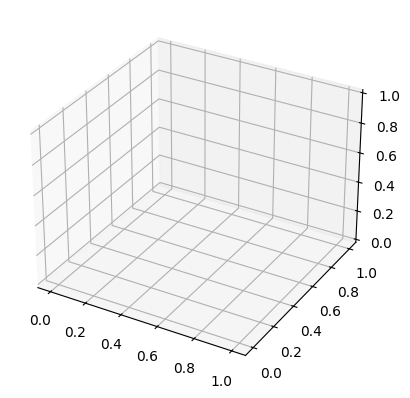

FileNotFoundError: [Errno 2] No such file or directory: '1E8k8gI_xYk3420_rotation_15.csv'

FileNotFoundError: [Errno 2] No such file or directory: '1E8k8gI_xYk3420_rotation_15.csv'

In [12]:
%run data_visualization.ipynb
import statistics
import math
import numpy as np
import pandas as pd

In [ ]:
#function returns new x coordinates based on point de fuite chosen
    #!this formula is for point de fuite centered at 0
def projective_geometry(pt_fuite, corrected_x,y):
    new_x = []
    for i in range(len(y)):
        val=corrected_x[i]*(y[i]-pt_fuite[1])/(-1*pt_fuite[1])
        new_x.append(val)

    return new_x

In [ ]:
def projective_geometry_not_centered(pt_fuite, corrected_x,y):
    ax = pt_fuite[0]
    by = pt_fuite[1]

    new_x = []
    for i in range(len(y)):
        slope = -by/(corrected_x[i]-ax)
        x_coord = (y[i]-by*(1+(ax/(corrected_x[i]-ax))))/(slope)
        new_x.append(x_coord)
    return new_x

In [ ]:
# def correcting_x(x):
#     correction = find_center(x)
#     # print("The value of the correction is:", correction)
#     corrected_x = []
#     for i in x:
#         corrected_x.append(i-correction)
#         # print(i)
#         # print(i-correction)
#     return corrected_x

In [ ]:
#loading my data using the function in the previous file
# x = load_data("init_demo.csv")[0]
# y = load_data("init_demo.csv")[1]
# z = load_data("init_demo.csv")[2]
# print(x)
# print(y)

In [ ]:
#x,y of point de fuite

# points = [[x[i], y[i]] for i in range(len(y))]

# #initial
# scatter_2d(x,y, title = "Initial Datapoint for Coffee")

# #changed
# pt_fuite = [0,-2]
# new_x = projective_geometry(pt_fuite, x, y)
# print(pt_fuite)
# scatter_2d(new_x, y, title = "Adjusted Datapoint with Projective Geometry")

# #changed, with not centered point de fuite
# pt_fuite = [find_center(x), -5]
# new_x = projective_geometry_not_centered(pt_fuite, x, y)
# scatter_2d(new_x, y, title = "Projective Geometry with Negative Vanishing Point")

# #with point de fuite on the top
# pt_fuite = [find_center(x),5]
# new_x = projective_geometry_not_centered(pt_fuite, x, y)
# scatter_2d(new_x, y, title = "Projective Geometry with Positive Vanishing Point")




In [ ]:
#creating a function so that Aly is happy.

#the y coordinate of the point de fuite should be between [-5,-1] U [3,8]
def xinlei_vinci(file_name, negativity = False):
    if(negativity == True):
        y_vanishing_point = np.random.uniform(-30, -5)
    else:
        y_vanishing_point = np.random.uniform(5,15)
    
    df = pd.read_csv(file_name)
    df.head()

    #setting the header of the new file, as the previous file
    new_df=df
    
    
    print(file_name)
    new_df.head()
    single_row = []
    #iterate through every row
    for row in range(len(df.index)):
        #finding the mean
        mean_x = []
        for col in df :
            if(col[0] == 'x'):
                mean_x.append(df[col].iloc[row])
        # ax = statistics.mean(mean_x)
        ax = np.mean(mean_x)
        #iterate through every column of the row, and transform it
        for col in df:
            #if the column is y, I know I have to apply the transformation to x!
            single_row.append(df[col].iloc[row])
            corrected_x = single_row[len(single_row)-2]
            if(col[0]=='y'):
                by = y_vanishing_point

                slope = -by/(corrected_x-ax)
                x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
                single_row[len(single_row)-2] = x_coord

        #append the row into the pandas dataframe
        new_df.loc[row] = single_row
        single_row = []

    new_file_name = file_name+'_projective_geo_'+str(int(abs(y_vanishing_point)))+'_'+str(negativity)+'.csv'
    new_df.to_csv(new_file_name, index=False)
                
            
            

        

    


In [ ]:
#testing
xinlei_vinci("new_files/coffee_test.csv", negativity = False )

data_four_labels_augmentation/dog/3m1X5NYCA_I238.csv
